In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 kB 10.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/DentalImages/OBB_Yolo.zip /content/

In [4]:
!unzip OBB_Yolo.zip

Archive:  OBB_Yolo.zip
   creating: OBB_Yolo/images/
   creating: OBB_Yolo/labels/
  inflating: OBB_Yolo/data.yaml      
  inflating: OBB_Yolo/images/train/1.png  
  inflating: OBB_Yolo/images/train/10.png  
  inflating: OBB_Yolo/images/train/11.png  
  inflating: OBB_Yolo/images/train/12.png  
  inflating: OBB_Yolo/images/train/13.png  
  inflating: OBB_Yolo/images/train/14.png  
  inflating: OBB_Yolo/images/train/15.png  
  inflating: OBB_Yolo/images/train/16.png  
  inflating: OBB_Yolo/images/train/17.png  
  inflating: OBB_Yolo/images/train/18.png  
  inflating: OBB_Yolo/images/train/19.png  
  inflating: OBB_Yolo/images/train/2.png  
  inflating: OBB_Yolo/images/train/20.png  
  inflating: OBB_Yolo/images/train/21.png  
  inflating: OBB_Yolo/images/train/22.png  
  inflating: OBB_Yolo/images/train/23.png  
  inflating: OBB_Yolo/images/train/24.png  
  inflating: OBB_Yolo/images/train/25.png  
  inflating: OBB_Yolo/images/train/26.png  
  inflating: OBB_Yolo/images/train/27.png  
 

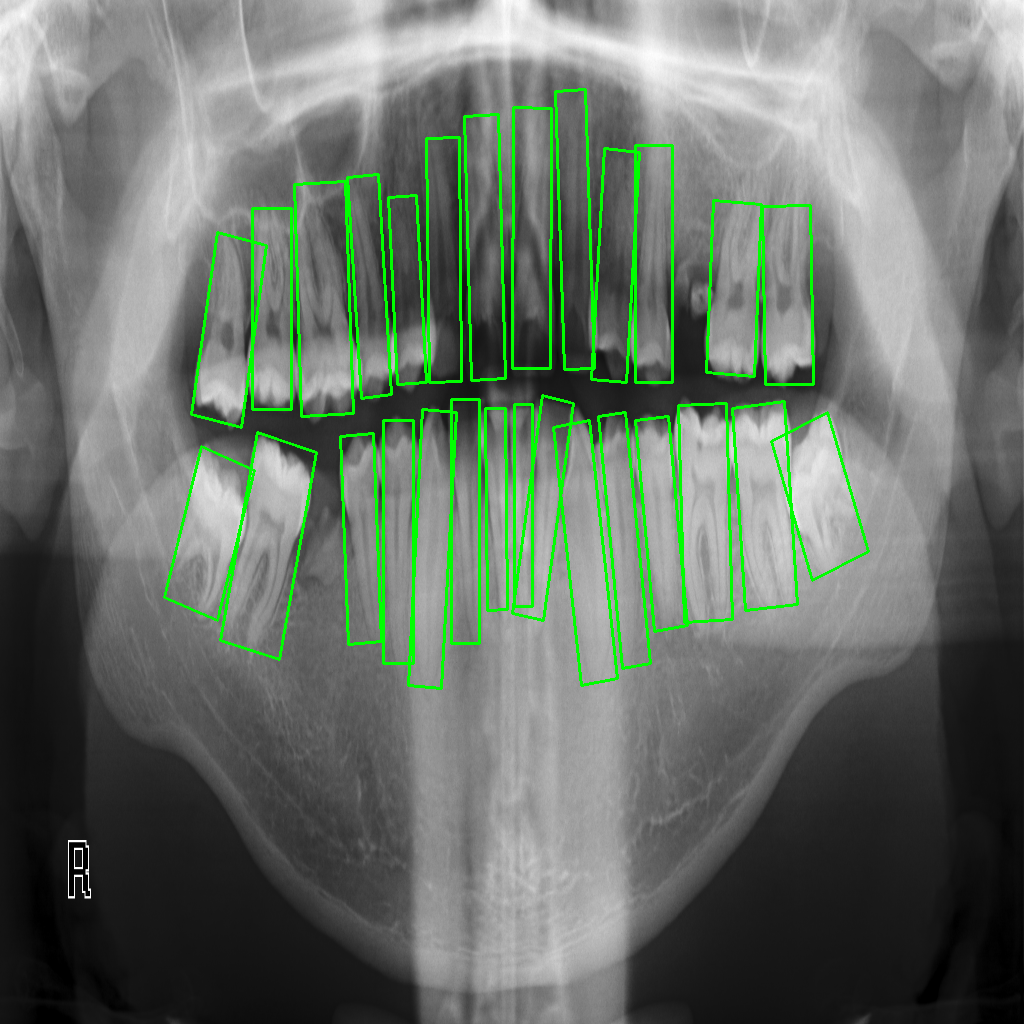

In [5]:
# Sanity check
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

YOLO_DATASET_LOCATION = "/content/OBB_Yolo/"
IMAGE_NUMBER = 2
# Load the image
image = cv2.imread(f"{YOLO_DATASET_LOCATION}images/train/{IMAGE_NUMBER}.png")
image = cv2.resize(image, (1024, 1024))

# Load the bounding boxes
with open(f"{YOLO_DATASET_LOCATION}labels/train/{IMAGE_NUMBER}.txt", "r") as f:
    lines = f.readlines()

# Function to draw boxes
def draw_boxes(image, lines):

    boxes = []
    for line in lines:

      class_id, x1, y1, x2, y2, x3, y3, x4, y4 = map(float, line.split())
      x1*=1024
      x2*=1024
      x3*=1024
      x4*=1024
      y1*=1024
      y2*=1024
      y3*=1024
      y4*=1024
      points = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], dtype=np.int32)


      points = points.reshape((-1, 1, 2))

      cv2.polylines(image, [points], True, (0, 255, 0), 2)


# Draw all boxes on the image
draw_boxes(image, lines)

cv2_imshow(image)

In [6]:
from ultralytics import YOLO

model = YOLO('yolov8n-obb.yaml')

results = model.train(data='/content/OBB_Yolo/data.yaml', epochs=100, imgsz=640)

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.yaml, data=/content/OBB_Yolo/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 47.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 93.7MB/s]


AMP: checks passed ✅


train: Scanning /content/OBB_Yolo/labels/train... 88 images, 2 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<00:00, 269.47it/s]

train: New cache created: /content/OBB_Yolo/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/OBB_Yolo/labels/val... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<00:00, 225.22it/s]

val: New cache created: /content/OBB_Yolo/labels/val.cache


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/obb/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.71G      5.129      3.653       4.29        345        640: 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.96G      5.084      3.508      4.201        393        640: 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.98G      4.984      3.139      4.087        402        640: 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.96G      4.762      2.664      3.923        371        640: 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.95G      4.525      2.378      3.839        517        640: 100%|██████████| 6/6 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.99G      4.165      2.067      3.709        505        640: 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.94G      3.695      1.837      3.612        395        640: 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.92G       3.25      1.754      3.576        311        640: 100%|██████████| 6/6 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.72G      3.048      1.681      3.491        419        640: 100%|██████████| 6/6 [00:00<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.63G      2.896      1.646      3.417        432        640: 100%|██████████| 6/6 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.72G      2.838      1.583      3.292        420        640: 100%|██████████| 6/6 [00:00<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.73G      2.732      1.515      3.291        465        640: 100%|██████████| 6/6 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.77G      2.682      1.463      3.103        385        640: 100%|██████████| 6/6 [00:00<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.71G      2.604      1.399      3.083        547        640: 100%|██████████| 6/6 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.75G      2.419        1.3      3.007        561        640: 100%|██████████| 6/6 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.75G      2.342      1.279      3.035        470        640: 100%|██████████| 6/6 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.76G      2.319      1.221      2.974        468        640: 100%|██████████| 6/6 [00:00<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.77G      2.295      1.245      3.047        465        640: 100%|██████████| 6/6 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         28        784      0.368    0.00255    0.00769     0.0014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.75G      2.176      1.188       3.01        391        640: 100%|██████████| 6/6 [00:00<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         28        784     0.0243      0.014     0.0207    0.00408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.75G      2.082      1.186      3.113        273        640: 100%|██████████| 6/6 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.93it/s]

                   all         28        784      0.322      0.114       0.11      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.73G      2.128      1.186      3.098        341        640: 100%|██████████| 6/6 [00:00<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         28        784      0.355      0.182      0.139     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.7G      2.032      1.119      3.022        505        640: 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         28        784      0.355      0.277      0.186     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.74G      2.019      1.122      3.006        457        640: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         28        784      0.376      0.321      0.212       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.72G      1.926      1.088      3.002        344        640: 100%|██████████| 6/6 [00:00<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         28        784       0.45      0.429      0.286     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.76G       1.91      1.054      2.933        473        640: 100%|██████████| 6/6 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         28        784      0.479      0.462       0.31      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.75G      1.842      1.019      2.994        382        640: 100%|██████████| 6/6 [00:00<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all         28        784      0.547      0.524      0.373      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.71G      1.839      1.022      2.936        530        640: 100%|██████████| 6/6 [00:00<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         28        784      0.565      0.543      0.416      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.69G      1.751      1.003      2.952        377        640: 100%|██████████| 6/6 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         28        784      0.482       0.49      0.326      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.74G      1.809      1.039      2.964        596        640: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         28        784      0.502      0.503      0.331       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.75G      1.741     0.9852      2.938        387        640: 100%|██████████| 6/6 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         28        784      0.653      0.642      0.534      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.69G      1.688     0.9935      2.987        413        640: 100%|██████████| 6/6 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         28        784      0.656      0.639      0.547      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.74G      1.667     0.9721      3.053        392        640: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         28        784      0.526      0.534      0.369       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.69G      1.595      0.903      2.977        474        640: 100%|██████████| 6/6 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         28        784      0.533       0.54      0.376      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.75G      1.631     0.9203      2.943        367        640: 100%|██████████| 6/6 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         28        784      0.593      0.594       0.46       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.64G      1.687      0.941      2.826        515        640: 100%|██████████| 6/6 [00:00<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         28        784      0.562      0.569      0.389      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.74G      1.644     0.9291      2.831        454        640: 100%|██████████| 6/6 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         28        784      0.466      0.468      0.266      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.76G      1.607     0.9061      2.895        509        640: 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         28        784      0.523      0.519      0.345      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.75G      1.558     0.9034      2.916        363        640: 100%|██████████| 6/6 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         28        784      0.497      0.504      0.331      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.74G      1.584     0.8932      2.805        348        640: 100%|██████████| 6/6 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         28        784      0.504      0.491      0.319      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.76G      1.546     0.8696      2.865        448        640: 100%|██████████| 6/6 [00:00<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         28        784      0.519      0.524      0.339      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.76G       1.55     0.8951      2.917        235        640: 100%|██████████| 6/6 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         28        784      0.465      0.466      0.281      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.73G      1.562     0.8813      2.772        578        640: 100%|██████████| 6/6 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         28        784       0.44      0.448      0.286      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.77G      1.522     0.8771      2.842        358        640: 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all         28        784       0.44      0.426      0.258      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.72G      1.489     0.8755      2.777        447        640: 100%|██████████| 6/6 [00:00<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         28        784      0.455      0.456      0.263      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.71G      1.481     0.8497      2.818        460        640: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         28        784      0.468      0.477      0.285      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.73G      1.476      0.828       2.72        393        640: 100%|██████████| 6/6 [00:00<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         28        784      0.476      0.472      0.278      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.73G       1.47     0.8325      2.784        436        640: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         28        784      0.491      0.489      0.293      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.75G      1.488     0.8424      2.698        426        640: 100%|██████████| 6/6 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         28        784      0.484      0.506      0.289       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.74G      1.515     0.8651      2.786        303        640: 100%|██████████| 6/6 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         28        784       0.47      0.458      0.258      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.75G      1.496     0.8295      2.675        412        640: 100%|██████████| 6/6 [00:00<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         28        784      0.443       0.44      0.267      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.76G      1.442     0.8262      2.736        304        640: 100%|██████████| 6/6 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         28        784       0.43      0.431      0.254       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.62G      1.416     0.8259       2.78        426        640: 100%|██████████| 6/6 [00:00<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         28        784       0.51      0.503      0.364      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.74G      1.427     0.8134       2.75        341        640: 100%|██████████| 6/6 [00:00<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         28        784      0.529      0.511      0.395      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.72G      1.479     0.8142      2.647        349        640: 100%|██████████| 6/6 [00:00<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         28        784      0.465       0.46      0.308       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.72G      1.485     0.8498      2.695        450        640: 100%|██████████| 6/6 [00:00<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         28        784      0.473      0.462      0.286      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.63G      1.454     0.8055      2.615        470        640: 100%|██████████| 6/6 [00:00<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         28        784       0.46      0.471      0.276      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.7G      1.392     0.7918      2.649        371        640: 100%|██████████| 6/6 [00:00<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         28        784      0.457      0.454      0.277      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.75G      1.449     0.8121      2.587        446        640: 100%|██████████| 6/6 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         28        784      0.426       0.43      0.263      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.73G      1.367     0.8058      2.702        319        640: 100%|██████████| 6/6 [00:00<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         28        784      0.445       0.45      0.292      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.69G      1.388     0.8001      2.678        450        640: 100%|██████████| 6/6 [00:00<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         28        784      0.473      0.474      0.332      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.7G      1.411     0.7947      2.648        388        640: 100%|██████████| 6/6 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         28        784      0.467      0.469      0.317      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.72G      1.426     0.7936       2.59        497        640: 100%|██████████| 6/6 [00:00<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         28        784      0.483      0.495      0.317      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.71G       1.31      0.768      2.619        423        640: 100%|██████████| 6/6 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         28        784      0.504      0.502      0.351      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.72G      1.345     0.7851      2.631        402        640: 100%|██████████| 6/6 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         28        784      0.523       0.52       0.39      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.73G      1.381     0.7825      2.667        375        640: 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         28        784      0.528      0.518      0.402       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.72G      1.346     0.7767      2.673        349        640: 100%|██████████| 6/6 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         28        784      0.525      0.537      0.373      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.75G      1.338     0.7684      2.637        378        640: 100%|██████████| 6/6 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         28        784      0.508      0.516      0.362      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.74G      1.328     0.7447      2.657        336        640: 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         28        784      0.485        0.5      0.324      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.72G      1.358     0.7755      2.558        461        640: 100%|██████████| 6/6 [00:00<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         28        784      0.459      0.476      0.293      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.75G      1.325     0.7492      2.544        439        640: 100%|██████████| 6/6 [00:00<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         28        784      0.455      0.445      0.286      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.7G       1.29     0.7446      2.551        365        640: 100%|██████████| 6/6 [00:00<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         28        784       0.44       0.45      0.278      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.74G      1.311     0.7639      2.555        397        640: 100%|██████████| 6/6 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all         28        784      0.501       0.51       0.36      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.69G      1.338     0.7582      2.582        466        640: 100%|██████████| 6/6 [00:00<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         28        784      0.492      0.499      0.345      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.72G      1.336     0.7516       2.52        412        640: 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         28        784      0.437      0.456      0.269      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.72G       1.33     0.7871      2.613        217        640: 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         28        784       0.46      0.445      0.274      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.73G      1.311     0.7544      2.575        424        640: 100%|██████████| 6/6 [00:00<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         28        784      0.513      0.504      0.364      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.75G      1.388     0.7735      2.491        495        640: 100%|██████████| 6/6 [00:00<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         28        784      0.522      0.514      0.378       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.74G        1.4     0.7961      2.459        430        640: 100%|██████████| 6/6 [00:00<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         28        784      0.481      0.482      0.323      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.63G      1.296     0.7433      2.574        359        640: 100%|██████████| 6/6 [00:00<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         28        784      0.468      0.469      0.303      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.75G      1.324     0.7528      2.466        560        640: 100%|██████████| 6/6 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         28        784      0.459      0.458      0.294      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.72G      1.294     0.7306      2.521        413        640: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         28        784      0.472      0.473      0.309      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.76G      1.278     0.7189      2.446        382        640: 100%|██████████| 6/6 [00:00<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         28        784      0.497      0.497      0.327      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.7G      1.283     0.7579      2.538        430        640: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         28        784      0.492      0.497       0.33      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.72G      1.255       0.73      2.505        450        640: 100%|██████████| 6/6 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         28        784      0.478      0.494      0.343      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.73G      1.259     0.7378      2.513        325        640: 100%|██████████| 6/6 [00:00<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         28        784      0.491      0.503      0.355      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.75G      1.288     0.7287      2.447        511        640: 100%|██████████| 6/6 [00:00<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         28        784      0.498       0.51       0.36      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.72G      1.272     0.7327      2.536        465        640: 100%|██████████| 6/6 [00:00<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         28        784        0.5      0.511      0.357      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.75G       1.27     0.7212      2.421        545        640: 100%|██████████| 6/6 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         28        784      0.487      0.499      0.336       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.7G      1.236     0.7172      2.543        401        640: 100%|██████████| 6/6 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         28        784      0.477      0.485      0.322      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.75G      1.277     0.7154      2.418        457        640: 100%|██████████| 6/6 [00:00<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         28        784      0.477      0.477      0.313      0.154


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.5G      1.261     0.9935      2.718        196        640: 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         28        784      0.474      0.474      0.312      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.73G      1.269     0.9902      2.714        213        640: 100%|██████████| 6/6 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         28        784      0.474      0.482      0.314      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.73G       1.29     0.9262      2.701        232        640: 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         28        784      0.486       0.49      0.329      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.73G      1.259     0.8803      2.674        202        640: 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         28        784      0.515      0.489      0.338      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.73G      1.253     0.8438      2.635        219        640: 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         28        784      0.515      0.495      0.339      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.59G      1.233     0.8022      2.615        210        640: 100%|██████████| 6/6 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         28        784      0.494      0.483      0.326      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.51G      1.225      0.782      2.636        242        640: 100%|██████████| 6/6 [00:00<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         28        784      0.494      0.481      0.321      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.51G      1.218     0.7681      2.659        218        640: 100%|██████████| 6/6 [00:00<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         28        784       0.49      0.482      0.327      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.51G      1.197     0.7505      2.607        219        640: 100%|██████████| 6/6 [00:00<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         28        784      0.501        0.5      0.347      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.51G      1.181     0.7425      2.637        232        640: 100%|██████████| 6/6 [00:00<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         28        784      0.506      0.511      0.358      0.161



100 epochs completed in 0.052 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/obb/train/weights/best.pt, 6.5MB

Validating runs/obb/train/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8n-obb summary (fused): 187 layers, 3077414 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


                   all         28        784      0.529      0.519      0.403       0.17
Speed: 0.3ms preprocess, 0.8ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/obb/train


In [21]:
!yolo task=obb mode=val model=/content/runs/obb/train/weights/best.pt conf=0.50 data=/content/OBB_Yolo/data.yaml

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8n-obb summary (fused): 187 layers, 3077414 parameters, 0 gradients, 8.3 GFLOPs
val: Scanning /content/OBB_Yolo/labels/val.cache... 28 images, 0 backgrounds, 0 corrupt: 100% 28/28 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.36s/it]
                   all         28        784      0.578      0.438      0.483      0.244
Speed: 1.6ms preprocess, 28.7ms inference, 0.0ms loss, 18.6ms postprocess per image
Results saved to runs/obb/val8
💡 Learn more at https://docs.ultralytics.com/modes/val


In [26]:
!mkdir /content/drive/MyDrive/DentalImages/obb_val
!cp -r runs/obb/val8 /content/drive/MyDrive/DentalImages/obb_val

mkdir: cannot create directory ‘/content/drive/MyDrive/DentalImages/obb_val’: File exists
